### Depthwise Separable Convolutional Network for image classification

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, SeparableConv2D

In [14]:
# Loading the dataset
(X_train, y_train),(X_test, y_test) = keras.datasets.cifar10.load_data()

### Using Normal Convolution Layers 

In [19]:
def vgg_block(layers_in, n_filter, n_conv):
    # adding convolution layers
    for _ in range(n_conv):
        layers_in = Conv2D(filters=n_filter, kernel_size=(3,3), padding=('same'), activation='relu')(layers_in)
        # adding Max Pooling layers
    layers_in = MaxPooling2D((2,2), strides=(2,2))(layers_in)
    return layers_in

In [20]:
# Configuring the neural network 
visible = Input(shape = (32, 32, 3))
layer = vgg_block(visible, 64, 2)
layer = vgg_block(layer, 128, 2)
layer = vgg_block(layer, 256, 2)
layer = Flatten()(layer)
layer = Dense(units=10, activation='softmax')(layer)

# Creating the model
model = Model(inputs=visible, outputs=layer)

# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 128)       73856     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 128)       147584    
                                                             

In [26]:
# Compiling the model 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

# Fitting the model
history = model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 22s 50ms/step - loss: 1.7500 - acc: 0.4374 - val_loss: 1.1868 - val_acc: 0.5757
Epoch 2/10
391/391 [==============================] - 19s 49ms/step - loss: 1.0258 - acc: 0.6403 - val_loss: 0.9377 - val_acc: 0.6779
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.7909 - acc: 0.7287 - val_loss: 0.8682 - val_acc: 0.7029
Epoch 4/10
391/391 [==============================] - 19s 49ms/step - loss: 0.6456 - acc: 0.7783 - val_loss: 0.8454 - val_acc: 0.7200
Epoch 5/10
391/391 [==============================] - 19s 49ms/step - loss: 0.5267 - acc: 0.8195 - val_loss: 0.7904 - val_acc: 0.7516
Epoch 6/10
391/391 [==============================] - 19s 49ms/step - loss: 0.4362 - acc: 0.8477 - val_loss: 0.8340 - val_acc: 0.7354
Epoch 7/10
391/391 [==============================] - 19s 49ms/step - loss: 0.3590 - acc: 0.8755 - val_loss: 0.8657 - val_acc: 0.7531
Epoch 8/10
391/391 [==============================] - 19s 49ms

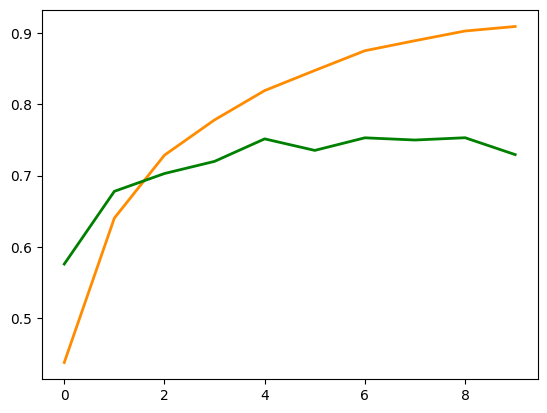

In [37]:
# Evaluation 
epochs = [i for i in range(10)]
plt.figure()
plt.plot(epochs, history.history['acc'], color='darkorange', lw=2, label = 'Training accuracy')
plt.plot(epochs, history.history['val_acc'], color='green', lw=2, label = 'Validation accuracy')

### Using Depth Separable Convolution Layer

In [41]:
def vgg_depthseparable_block(layers_in, n_filter, n_conv):
    # adding convolution layers
    for _ in range(n_conv):
        layers_in = SeparableConv2D(filters=n_filter, kernel_size=(3,3), padding=('same'), activation='relu')(layers_in)
        # adding Max Pooling layers
    layers_in = MaxPooling2D((2,2), strides=(2,2))(layers_in)
    return layers_in

In [42]:
# Configuring the neural network 
visible = Input(shape = (32, 32, 3))
layer = vgg_depthseparable_block(visible, 64, 2)
layer = vgg_depthseparable_block(layer, 128, 2)
layer = vgg_depthseparable_block(layer, 256, 2)
layer = Flatten()(layer)
layer = Dense(units=10, activation='softmax')(layer)

# Creating the model
model = Model(inputs=visible, outputs=layer)

# Model Summary
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 separable_conv2d_6 (Separa  (None, 32, 32, 64)        283       
 bleConv2D)                                                      
                                                                 
 separable_conv2d_7 (Separa  (None, 32, 32, 64)        4736      
 bleConv2D)                                                      
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 separable_conv2d_8 (Separa  (None, 16, 16, 128)       8896      
 bleConv2D)                                                

In [43]:
# Compiling the model 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics='acc')

# Fitting the model
history_dscv = model.fit(x=X_train, y=y_train, batch_size=128, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 13s 31ms/step - loss: 1.8249 - acc: 0.3250 - val_loss: 1.4694 - val_acc: 0.4607
Epoch 2/10
391/391 [==============================] - 12s 31ms/step - loss: 1.3232 - acc: 0.5282 - val_loss: 1.2303 - val_acc: 0.5664
Epoch 3/10
391/391 [==============================] - 12s 30ms/step - loss: 1.1254 - acc: 0.6054 - val_loss: 1.0557 - val_acc: 0.6233
Epoch 4/10
391/391 [==============================] - 12s 30ms/step - loss: 0.9700 - acc: 0.6595 - val_loss: 0.9301 - val_acc: 0.6736
Epoch 5/10
391/391 [==============================] - 12s 30ms/step - loss: 0.8257 - acc: 0.7132 - val_loss: 0.8678 - val_acc: 0.7027
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 0.7175 - acc: 0.7517 - val_loss: 0.8098 - val_acc: 0.7216
Epoch 7/10
391/391 [==============================] - 12s 30ms/step - loss: 0.6283 - acc: 0.7826 - val_loss: 0.7558 - val_acc: 0.7378
Epoch 8/10
391/391 [==============================] - 12s 31ms

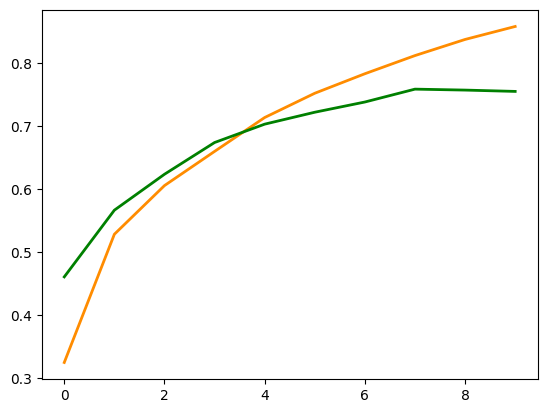

In [48]:
# Evaluation 
epochs = [i for i in range(10)]
plt.figure()
plt.plot(epochs, history_dscv.history['acc'], color='darkorange', lw=2, label = 'Training accuracy')
plt.plot(epochs, history_dscv.history['val_acc'], color='green', lw=2, label = 'Validation accuracy')

### Conclusion

A normal convolution layer applies convolution along all the channels in the input while a depth separable convolution layer applies convolution along only one spatial dimension. 

In an RGB image, there are 3 channels with each channel containing the pixel value for that color. The depth separable convolution applies along each channel of the input and gives an the same outputs for each channel separately. While using depth wise convolution we need to use a point wise convolution layer which is basically has kernel size 1x1, hence looking at a single point across all channels. 

The main advantage of using depth separable convolution layer is that the number of parameters after the convolution are very less compared to a normal convolution layer. For eg. Lets say we wanted to apply 64 normal convolution filters to an image to have a 64 channel output, the number of parameters will be 3 x 3 x 3 x 64 + 64(bias) = 1792. On the other hand, using depth separable convolution will result in 3 x 3 x 1 x 3 + 3(bias) which is the single channel output and then the point wise convolution will add up with parameters 1 x 1 x 3 x 64 + 64(bias) resulting in only 256 parameters at the end of both the layers. 

Depthwise separable convolutions is more likely to work better on deeper models that might face an overfitting problem and on layers with larger kernels since there is a greater decrease in parameters and computations that would offset the additional computational cost of doing two convolutions instead of one.